# Werkcollege Classical Mechanics b, serie 6 
## Werkcollegeopgave

We zullen een probleem bekijken waarvoor we de uiteindelijke differentiaalvergelijking numeriek gaan oplossen met behulp van een Py2thon routine.
## 1.  Knikkerbaan.

We zullen een probleem bekijken waarvoor we de uiteindelijke differentiaalvergelijking numeriek gaan oplossen met behulp van een Python routine.

Beschouw een deeltje met massa $m$ dat van een knikkerbaan afglijdt. We nemen geen rolbeweging mee, dus het is effectief een puntmassa. De vorm van de knikkerbaan wordt beschreven door $y=x^3$.

Schrijf de Langrangiaan op voor dit probleem, en laat zien dat de resulterende bewegingsvergelijking wordt beschreven door,
$
\ddot{x}(1+9x^4) + 18 x^3 \dot{x}^2 + 3 g x^2 = 0,
$
waar $g$ de valversnelling is.

Dit is een differentiaalvergelijking die analytisch lastig is op te lossen, dus gaan we het numeriek doen. Daartoe gebruiken we de Runge-Kutta methode.

## Runge-Kutta Methode

Bij diffusie heb je al eens een differentiaalvergelijking numeriek geintegreerd. Je hebt als het goed is ook gezien dat je, door verschillende methoden te gebruiken, de fout ten opzichte van de werkelijke waarde kon verkleinen. In deze programmeeropgave ga je aan de slag met de Runge-Kutta methode om een Lagrangevergelijking numeriek te integreren.

Eigenlijk bestaat er een hele familie van methoden met de naam Runge-Kutta methoden. De bekendste en meest gebruikte hiervan, die je hier ook gaat gebruiken, is de vierde orde Runge-Kutta methode. De Runge-Kutta methoden zijn allemaal gebaseerd op hetzelfde idee: een van de variabelen in de differentiaalvergelijking (vaak de tijd) wordt met een bepaalde stapgrootte opgehoogd, en vervolgens wordt afgeschat hoe de andere variabele verandert. Als we bijvoorbeeld een algemene (expliciete) eerste orde gewone differentiaalvergelijking met beginvoorwaarden nemen:

\begin{equation}
	\frac{dy}{dx} = f \left( x, y \right), y \left( x_0 \right) = y_0
    \label{general_1}
\end{equation}

Instinctief zou je de waarde $\frac{dy}{dx} = f \left( x_0, y_0 \right)$ vermenigvuldigen met een stapgrootte $h$, die bij $y_0$ optellen, en ook $x_0$ met $h$ ophogen. Dit staat bekend als de Eulermethode, en is ook de Runge-Kutta methode van de eerste orde. Wiskundig uitgedrukt:

\begin{equation}
y_1 = y_0 + hf \left( x_0, y_0 \right), x_1 = x_0 + h
\end{equation}

Of voor een algemene stap:

\begin{equation}
y_{n+1} = y_n + hf \left( x_n, y_n \right), x_{n+1} = x_n + h
\end{equation}

Dit algoritme heeft echter nog een vrij grote fout. Daarom worden Runge-Kutta methoden van hogere ordes gebruikt. De methode van de vierde orde is als volgt:

\begin{equation}
y_{n+1} = y_n + \frac{h}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right), x_{n+1} = x_n + h
\end{equation}

Waarbij de getallen $k_i$ gegeven worden door:

\begin{equation}
k_1 = f \left(x_n, y_n \right)
\end{equation}


\begin{equation}
k_2 = f \left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1 \right)
\end{equation}


\begin{equation}
k_3 = f \left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2 \right)
\end{equation}


\begin{equation}
k_4 = f \left(x_n + h, y_n + hk_3 \right)
\end{equation}

De algemene structuur hiervan is dat het gewogen gemiddelde wordt genomen van een aantal steeds verder verfijnde hellingen. De eerste term is zoals in de methode van Euler. Daarna wordt de helling bepaald op de helft van de stap, waarbij de zojuist berekende stap wordt gebruikt. Dan wordt dat weer gedaan, nu met de tweede waarde, en als laatste wordt de helling aan het einde van de stap berekend. De afleiding van dit algoritme zal hier niet worden gegeven, maar kan algemeen gevonden worden in het artikel \textit{Coefficients for the Study of Runge-Kutta Integration Processes} van J. C. Butcher (1963, Journal of the Australian Mathematical Society, Vol. 3). Dit is echter een vrij zwaar artikel, en de Engelse wikipediapagina van Runge-Kutta methods geeft een relatief simpele afleiding voor de vierde orde. 

Een klein probleem met de Runge-Kutta methode is dat hij alleen bruikbaar is voor eerstegraads gewone differentiaalvergelijkingen. Aangezien de Lagrangevergelijking in het algemeen een tweede orde partiele differentiaalvergelijking is, moeten er nog wat trucjes toegepast worden. Zo kan een hogere orde differentiaalvergelijking altijd worden geschreven als een stelsel van evenveel eerstegraads differentiaalvergelijkingen van de eerste orde. Aangezien de algemene uitdrukking van een eerstegraads differentiaalvergelijking zowel met scalairen als met vectoren kan werken, is dit geen probleem. In het algemeen ziet dat er als volgt uit:

\begin{equation}
\dot{\vec{y}} = \vec{f} \left(t, \vec{y} \right)
\end{equation}

Met daarin, voor $\vec{y}$ tweedimensionaal: 

\begin{equation}
\vec{y} = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}, \vec{f} = \begin{pmatrix} f_1 \left( t, \vec{y} \right) \\ f_2 \left( t, \vec{y} \right) \end{pmatrix}
\end{equation}

Nu is het nog een kwestie van handige definities kiezen. Als je de Lagrangevergelijking wilt integreren kan je, als de potentiaal niet van de snelheid afhangt, de volgende aanvullende vergelijking gebruiken:

\begin{equation}
\dot{x} = w
\end{equation}

Aangezien nu ook geldt dat $\ddot{x} = \dot{w}$, reduceert de Lagrangevergelijking tot een eerstegraads differentiaalvergelijking in twee variabelen. Nu lopen we ook gelijk tegen partiele differentiaalvergelijkingen aan. Dit hoeft echter geen probleem te zijn: zoals we net zagen, kan de variabele $y$ ook een vector zijn. De verschillende variabelen kunnen nu in die vector gezet worden, en de Lagrangevergelijkingen moeten zo omgeschreven worden dat ze in de vorm staan van de algemene ODE vergelijking. De vergelijkingen zo omschrijven kan nog een uitdaging zijn.

# Thuisopgave
Vorm met een medestudent een tweetal en lever gezamenlijk ingevuld deze notebook in.
## De opdracht  
Schrijf een Python routine om het bovenstaande probleem van de beweging van een proton in een inhomogeen magneetveld numeriek op te lossen. Deze notebook bevat alvast twee functies die je kunt gebruiken:
- `runga_kutta(f, t, y, h)` is een voorgeprogrammeerdere Runga Kutta integrator. 
- `plot_traject(x, y, v)` is een routine die een figuur creëert. 
deze kun je gebruiken voor het toepassen van de Runge-Kutta methode.  
In verdere cellen staat de opdracht verder uitgewerkt, zorg ervoor dat je alle vragen beantwoordt.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import g
%matplotlib inline

In [2]:
# voor de differentiaalvergelijking ydot = f(t, y) (zie vergelijking 9 in de opdracht),
# geef de volgende waarde van y voor gegeven y en t,
# gebruik makend van de vierde orde Runge-Kutta methode met stapgrootte h
def runge_kutta(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h / 2.0, y + h * k1 / 2.0)
    k3 = f(t + h / 2.0, y + h * k2 / 2.0)
    k4 = f(t + h, y + h * k3)
    return y + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

In [6]:
# plot het traject van de knikker en geef op elk punt (x, y) de snelheid weer door de kleur te varieren met een gradient
def plot_traject(x, y, snelheid, x_direction=False):
    f, ax = plt.subplots()
    
    # gebruik de volgende gradient: blauw -> geel -> rood
    cm = plt.cm.get_cmap('RdYlBu_r')    
    col = ax.scatter(x, y, c = snelheid, cmap = cm, lw = 0.0, marker=".")

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    
    # laat een balk zien die de gradient weergeeft
    cbaxes = f.add_axes([0.85, 0.1, 0.03, 0.8])
    plt.colorbar(col, cax = cbaxes, label = 'Snelheid (m/s)' if not x_direction else 'Snelheid-x (m/s)')
    plt.subplots_adjust(bottom = 0.1, top = 0.9, left = 0.1, right = 0.77)

    ax.set_title('Traject van knikker over de baan')
    plt.show()

# Bewegingsplots
Schrijf hier onder een Python routine om het bovenstaande probleem van de beweging op de knikkerbaan op te lossen. Onderzoek in ieder geval de volgende situaties:
* Hoe snel moet het deeltje gaan om van $x=-10$ tot stilstand te komen in de oorsprong?
* Hoe snel moet een deeltje vanuit de oorsprong gaan om tot $y=10$ te komen

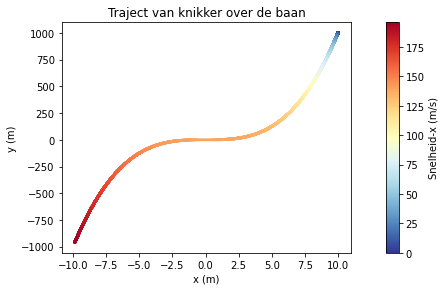

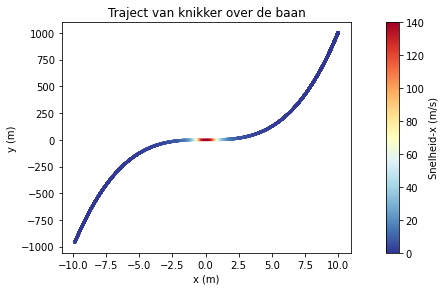

In [34]:
def f(t, vec):
    return np.array([
        vec[1],
        -(18 * vec[0] ** 3 * vec[1] ** 2 + 3 * g * vec[0] ** 2) / (1 + 9 * vec[0] ** 4)
    ])

h = 0.001
dt = 1

steps = 20000

x_initial = 10.
w_initial = 0.

trace = np.zeros((steps, 3))
trace[0] = [
    x_initial,
    w_initial,
    0
] # x, w, t
for i in range(1, steps):
    trace[i][:2] = runge_kutta(f, trace[i-1][2], trace[i-1][:2], h)
    trace[i][2] = trace[i-1][2] + dt

plot_traject(trace[:, 0], trace[:, 0] ** 3, np.sqrt(trace[:, 1] ** 2 + (3 * trace[:, 0] ** 2 * trace[:,1]) ** 2), x_direction=True)
plot_traject(trace[:, 0], trace[:, 0] ** 3, np.abs(trace[:, 1]), x_direction=True)

### Antwoord
Licht hier toe wat je ziet in de figuren, waarom dit relevant is en wat het doel is van deze plot.

## Energieplots

Plot de energie in het systeem als functie van de tijd, voor in ieder geval beide van de bovenstaande situaties. 

In [ ]:
# Schrijf hier de code die je gebruikt om het derde deelprobleem op te lossen

### Antwoord
Licht hier toe wat je ziet in de figuren, waarom dit relevant is en wat het doel is van deze plot.

## Energieverlies

Wat is de minimale stapgrootte waarmee je nog steeds redelijke oplossing krijgt? Kwantificeer dit door voor drie stapgroottes te onderzoeken wat het energieverlies voor beide situaties. 

In [ ]:
# Schrijf hier de code die je gebruikt om het derde deelprobleem op te lossen

### Antwoord
Licht hier toe wat je ziet in de figuren, waarom dit relevant is en wat het doel is van deze plot.

## Einde
Dit is het einde van deze notebook, zorg ervoor dat je alle plots die je laat zien ook kwalitatief beschrijft. 